In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [3]:
data = pd.read_csv(r'predictive_maintenance.csv')

# Analyse exploratoire des données

In [10]:
"""
UDI : Identifiant unique du produit.
Product ID : Identifiant du produit.
Type : Type de produit.
Air temperature [K] : Température de l'air en Kelvin.
Process temperature [K] : Température du processus en Kelvin.
Rotational speed [rpm] : Vitesse de rotation en tours par minute.
Torque [Nm] : Couple en Newton-mètres.
Tool wear [min] : Usure de l'outil en minutes.
Target : Cible (éventuellement le résultat ou la classe à prédire).
Failure Type : Type de défaillance.
"""

"\nUDI : Identifiant unique du produit.\nProduct ID : Identifiant du produit.\nType : Type de produit.\nAir temperature [K] : Température de l'air en Kelvin.\nProcess temperature [K] : Température du processus en Kelvin.\nRotational speed [rpm] : Vitesse de rotation en tours par minute.\nTorque [Nm] : Couple en Newton-mètres.\nTool wear [min] : Usure de l'outil en minutes.\nTarget : Cible (éventuellement le résultat ou la classe à prédire).\nFailure Type : Type de défaillance.\n"

In [4]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ UDI                    │   0 │     0 │    5000 │   2887 │      1 │   2501 │  5000 │  7500 │ 10000 │ ▇▇▇▇▇▇ │  │
│ │ Air temperature [K]    │   0 │     0 │     300 │      2 │  295.3 │  298.3 │ 300.1 │ 301.5 │ 304.5 │ ▁▆▇▇▅▂ │  │
│ │ Process temperature    │   0 │     0 │     310 │  1.484 │  305.7 │  308.8 │ 310.1 │ 311.1 │ 313.8 │  ▃▇▇▅▁ │  │
│ │ [K]                    │     │       │         │        │        │        │       │       │       │        │  │
│ │ Rotational speed [rpm] │   0 │     0 │    1539 │  179.3 │   1168 │   1423 │  1503 │  1612 │  2886 │  ▅▇▁   │  │
│ │ Torque [Nm]            │   0 │     0 │   39.99 │  9.969 │    3.8 │   33.2 │  40.1 │  46.8 │  76.6 │  ▂▇▇▂  │  │
│ │ Tool wear [min]        │   0 │     0 │     108 │  63.65 │      0 │     53 │   108 │   162 │   253 │ ▇▇▇▇▇▁ │  │
│ │ Target                 │   0 │     0 │  0.0339 │  0.181 │      0 │      0 │     0 │     0 │     1 │   ▇    │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product ID                 │      0 │          0 │                            1 │                    10000 │  │
│ │ Type                       │      0 │          0 │                            1 │                    10000 │  │
│ │ Failure Type               │      0 │          0 │                            2 │                    20157 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
# Convertir les °K en °C
data['Air temperature [°C]'] = data['Air temperature [K]'] - 273.15
data['Process temperature [°C]'] = data['Process temperature [K]'] - 273.15
data['Temperature difference [°C]'] =  data['Process temperature [°C]'] - data['Air temperature [°C]']
data.drop(['Air temperature [K]', 'Process temperature [K]'], axis=1, inplace=True)

In [7]:
data.head()

,UDI,Product ID,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [°C],Process temperature [°C],Temperature difference [°C]
0,1,M14860,M,1551,42.8,0,0,No Failure,24.95,35.45,10.5
1,2,L47181,L,1408,46.3,3,0,No Failure,25.05,35.55,10.5
2,3,L47182,L,1498,49.4,5,0,No Failure,24.95,35.35,10.4
3,4,L47183,L,1433,39.5,7,0,No Failure,25.05,35.45,10.4
4,5,L47184,L,1408,40.0,9,0,No Failure,25.05,35.55,10.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UDI                          10000 non-null  int64  
 1   Product ID                   10000 non-null  object 
 2   Type                         10000 non-null  object 
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Air temperature [°C]         10000 non-null  float64
 9   Process temperature [°C]     10000 non-null  float64
 10  Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 859.5+ KB


<Axes: xlabel='Count', ylabel='Failure Type'>

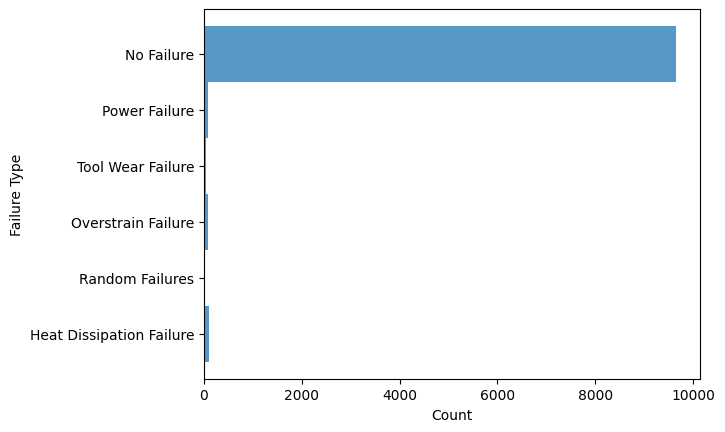

In [16]:
sns.histplot(data=data, y='Failure Type', bins=range(1, 7), discrete=True, edgecolor='none')

<Axes: xlabel='Target', ylabel='count'>

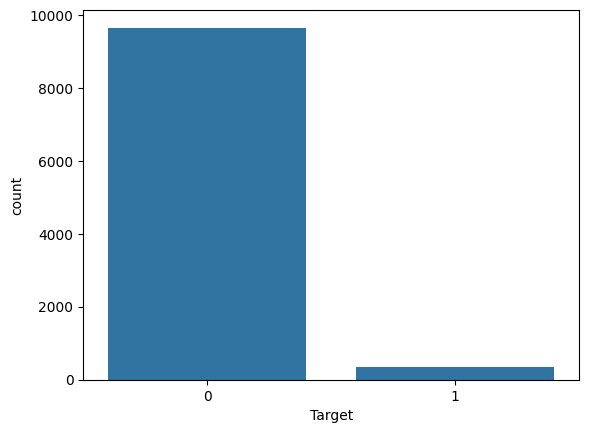

In [23]:
sns.countplot(data=data, x='Target')

<Axes: xlabel='Type', ylabel='count'>

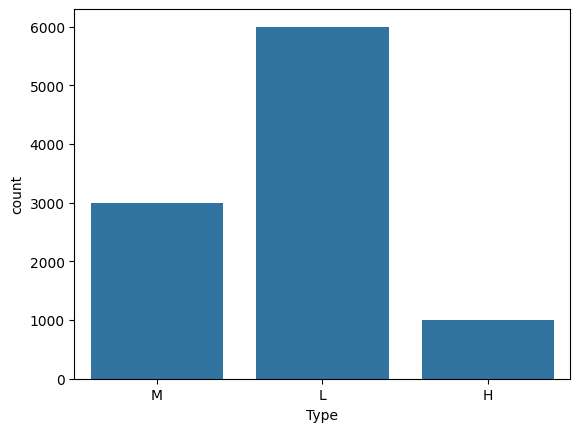

In [24]:
sns.countplot(data=data, x='Type')